In [ ]:
import numpy as np
import random
from collections import deque
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

class EnergyManagementAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95  # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(tf.keras.Input(shape=(self.state_size,)))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state, verbose=0)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = reward + self.gamma * np.amax(self.model.predict(next_state, verbose=0)[0])
            target_f = self.model.predict(state, verbose=0)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)

if __name__ == "__main__":
    # Environment parameters
    state_size = 4  # Example state: [current energy usage, time of day, temperature, price]
    action_size = 2  # Example actions: [0: reduce usage, 1: maintain usage]
    agent = EnergyManagementAgent(state_size, action_size)
    episodes = 100

    # Train the agent in the environment
    for e in range(episodes):
        # Reset environment for each episode
        state = np.reshape(np.random.rand(state_size), [1, state_size])
        done = False
        time = 0

        while not done:
            # Take action
            action = agent.act(state)
            # Simulate next state and reward (replace with environment logic)
            next_state = np.reshape(np.random.rand(state_size), [1, state_size])
            reward = random.uniform(-1, 1)  # Example reward
            done = time >= 20  # Example end condition

            # Remember the experience
            agent.remember(state, action, reward, next_state, done)

            # Move to the next state
            state = next_state
            time += 1

        # Replay experience to train the model
        if len(agent.memory) > 32:
            agent.replay(32)

        # Print progress
        print(f"Episode: {e+1}/{episodes}, Score: {time}, Epsilon: {agent.epsilon:.2f}")


Episode: 1/100, Score: 21, Epsilon: 1.00
Episode: 2/100, Score: 21, Epsilon: 0.99
Episode: 3/100, Score: 21, Epsilon: 0.99
Episode: 4/100, Score: 21, Epsilon: 0.99
Episode: 5/100, Score: 21, Epsilon: 0.98
Episode: 6/100, Score: 21, Epsilon: 0.98
Episode: 7/100, Score: 21, Epsilon: 0.97
Episode: 8/100, Score: 21, Epsilon: 0.97
Episode: 9/100, Score: 21, Epsilon: 0.96
Episode: 10/100, Score: 21, Epsilon: 0.96
Episode: 11/100, Score: 21, Epsilon: 0.95
Episode: 12/100, Score: 21, Epsilon: 0.95
Episode: 13/100, Score: 21, Epsilon: 0.94
Episode: 14/100, Score: 21, Epsilon: 0.94
Episode: 15/100, Score: 21, Epsilon: 0.93
Episode: 16/100, Score: 21, Epsilon: 0.93
Episode: 17/100, Score: 21, Epsilon: 0.92
Episode: 18/100, Score: 21, Epsilon: 0.92
Episode: 19/100, Score: 21, Epsilon: 0.91
Episode: 20/100, Score: 21, Epsilon: 0.91
Episode: 21/100, Score: 21, Epsilon: 0.90
Episode: 22/100, Score: 21, Epsilon: 0.90
Episode: 23/100, Score: 21, Epsilon: 0.90
Episode: 24/100, Score: 21, Epsilon: 0.89
E

In [ ]:
state_size = 4  # Example state: [waste level, time of day, weather, distance to collection point]
action_size = 2  # Example actions: [0: wait, 1: collect waste]


In [ ]:
# Environment parameters
state_size = 4  # Example state: [waste level, time of day, weather, distance to collection point]
action_size = 2  # Example actions: [0: wait, 1: collect waste]
agent = EnergyManagementAgent(state_size, action_size)
episodes = 100

# Waste management specific parameters
threshold = 0.7  # Waste level threshold (between 0 and 1, where 1 means full capacity)

# Train the agent in the environment
for e in range(episodes):
    # Reset environment for each episode
    waste_level = random.uniform(0, 0.5)  # Start with a random waste level below the threshold
    state = np.reshape([waste_level, random.uniform(0, 24), random.uniform(0, 1), random.uniform(0, 10)], [1, state_size])
    done = False
    time = 0
    overflow_count = 0  # Track overflow events
    rewards = []

    while not done:
        # Take action
        action = agent.act(state)
        # Simulate next state and reward (replace with environment logic)
        waste_level += random.uniform(0, 0.1)  # Waste increases over time
        if waste_level > 1.0:  # Overflow occurred
            overflow_count += 1
            waste_level = 1.0

        next_state = np.reshape([waste_level, random.uniform(0, 24), random.uniform(0, 1), random.uniform(0, 10)], [1, state_size])

        # Reward structure
        reward = -1  # Default reward for time passing
        if waste_level > threshold and action == 1:
            reward = 10  # Positive reward for timely collection
            waste_level = 0  # Waste collected
        elif waste_level < threshold and action == 1:
            reward = -5  # Penalty for collecting too early

        rewards.append(reward)

        done = time >= 20  # Example end condition

        # Remember the experience
        agent.remember(state, action, reward, next_state, done)

        # Move to the next state
        state = next_state
        time += 1

    # Replay experience to train the model
    if len(agent.memory) > 32:
        agent.replay(32)

    # Print progress
    print(f"Episode: {e+1}/{episodes}, Score: {time}, Epsilon: {agent.epsilon:.2f}, Overflow Events: {overflow_count}, Average Reward: {np.mean(rewards):.2f}")
plt.figure(figsize=(15, 5))



Episode: 1/100, Score: 21, Epsilon: 1.00, Overflow Events: 0, Average Reward: -1.81
Episode: 2/100, Score: 21, Epsilon: 0.99, Overflow Events: 0, Average Reward: -2.76
Episode: 3/100, Score: 21, Epsilon: 0.99, Overflow Events: 0, Average Reward: -2.05
Episode: 4/100, Score: 21, Epsilon: 0.99, Overflow Events: 0, Average Reward: -2.38
Episode: 5/100, Score: 21, Epsilon: 0.98, Overflow Events: 0, Average Reward: -1.62
Episode: 6/100, Score: 21, Epsilon: 0.98, Overflow Events: 0, Average Reward: -1.05
Episode: 7/100, Score: 21, Epsilon: 0.97, Overflow Events: 0, Average Reward: -2.19
Episode: 8/100, Score: 21, Epsilon: 0.97, Overflow Events: 0, Average Reward: -1.62
Episode: 9/100, Score: 21, Epsilon: 0.96, Overflow Events: 0, Average Reward: -2.00
Episode: 10/100, Score: 21, Epsilon: 0.96, Overflow Events: 0, Average Reward: -2.76
Episode: 11/100, Score: 21, Epsilon: 0.95, Overflow Events: 0, Average Reward: -2.19
Episode: 12/100, Score: 21, Epsilon: 0.95, Overflow Events: 0, Average Rew

Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Episode: 28/100, Score: 21, Epsilon: 0.87, Overflow Events: 0, Average Reward: -2.38
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

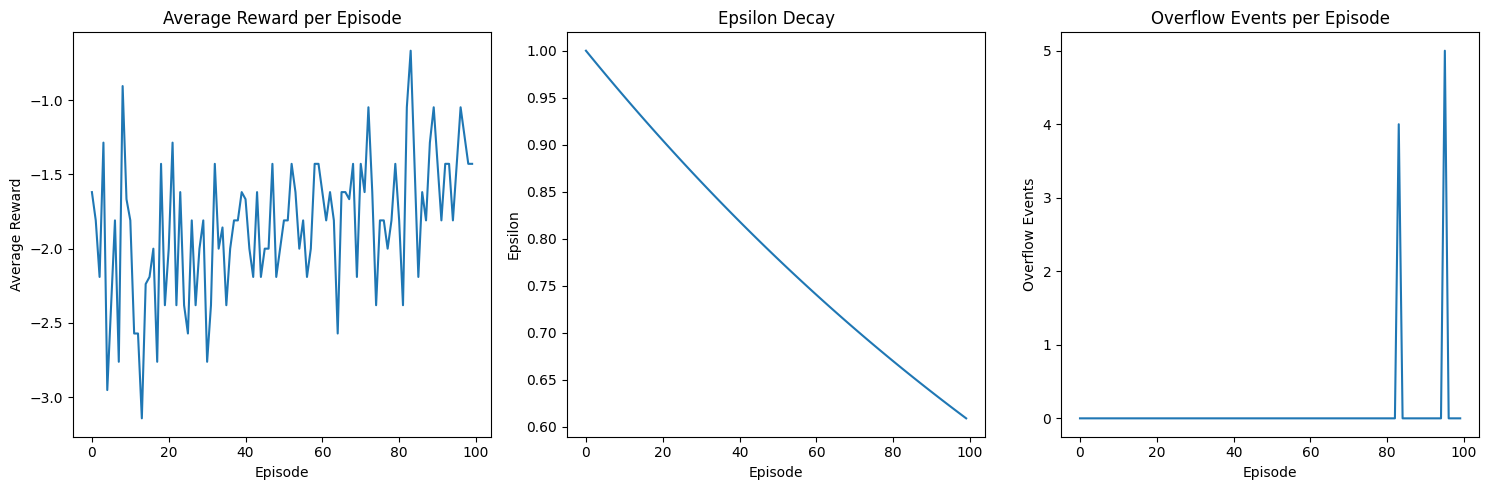

In [ ]:
import numpy as np
import random
from collections import deque
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

class EnergyManagementAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0   # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        # Update learning rate parameter
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma *
                          np.amax(self.model.predict(next_state)[0]))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Environment parameters
state_size = 4  # Example state: [waste level, time of day, weather, distance to collection point]
action_size = 2  # Example actions: [0: wait, 1: collect waste]
agent = EnergyManagementAgent(state_size, action_size)
episodes = 100

# Waste management specific parameters
threshold = 0.7  # Waste level threshold (between 0 and 1, where 1 means full capacity)

# Tracking metrics
episode_rewards = []
epsilon_values = []
overflow_events_per_episode = []

# Train the agent in the environment
for e in range(episodes):
    # Reset environment for each episode
    waste_level = random.uniform(0, 0.5)  # Start with a random waste level below the threshold
    state = np.reshape([waste_level, random.uniform(0, 24), random.uniform(0, 1), random.uniform(0, 10)], [1, state_size])
    done = False
    time = 0
    overflow_count = 0  # Track overflow events
    rewards = []

    while not done:
        # Take action
        action = agent.act(state)
        # Simulate next state and reward (replace with environment logic)
        waste_level += random.uniform(0, 0.1)  # Waste increases over time
        if waste_level > 1.0:  # Overflow occurred
            overflow_count += 1
            waste_level = 1.0

        next_state = np.reshape([waste_level, random.uniform(0, 24), random.uniform(0, 1), random.uniform(0, 10)], [1, state_size])

        # Reward structure
        reward = -1  # Default reward for time passing
        if waste_level > threshold and action == 1:
            reward = 10  # Positive reward for timely collection
            waste_level = 0  # Waste collected
        elif waste_level < threshold and action == 1:
            reward = -5  # Penalty for collecting too early

        rewards.append(reward)

        done = time >= 20  # Example end condition (episode ends after 20 timesteps)

        # Remember the experience
        agent.remember(state, action, reward, next_state, done)

        # Move to the next state
        state = next_state
        time += 1

    # Replay experience to train the model
    if len(agent.memory) > 32:
        agent.replay(32)

    # Store metrics
    episode_rewards.append(np.mean(rewards))
    epsilon_values.append(agent.epsilon)
    overflow_events_per_episode.append(overflow_count)

    # Print progress
    print(f"Episode: {e+1}/{episodes}, Score: {time}, Epsilon: {agent.epsilon:.2f}, Overflow Events: {overflow_count}, Average Reward: {np.mean(rewards):.2f}")

# Visualization
plt.figure(figsize=(15, 5))

# Plot Average Reward per Episode
plt.subplot(1, 3, 1)
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Average Reward per Episode')

# Plot Epsilon Decay
plt.subplot(1, 3, 2)
plt.plot(epsilon_values)
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title('Epsilon Decay')

# Plot Overflow Events per Episode
plt.subplot(1, 3, 3)
plt.plot(overflow_events_per_episode)
plt.xlabel('Episode')
plt.ylabel('Overflow Events')
plt.title('Overflow Events per Episode')

plt.tight_layout()
plt.show()
